# I. Data exploration and visualizations

This document will help us understand the data we have.

1. Data preparation
2. Data visualizations
    - Number of documents in each label
    - Number of documents with multiple labels
    - Most common words per label (a couple of examples)

In [1]:
# import libraries
import os 
import csv
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
    
%matplotlib inline
%matplotlib inline

### 1. Data preparation

In this part, we shall import and merge the documents we have for training with its label.

**1.1 Import datasets, remove duplicates and check for nulls**

In [2]:
#import first data set (train values)
train=pd.read_csv('train_values.csv',sep=',')
train.shape

(18830, 2)

In [3]:
#quick visualization
train.head(2)

,row_id,doc_text
0,0,"For more information, visit http://www.wor..."
1,1,...


In [4]:
# See how many duplicates per rowid I have on test training data 
print(train.shape)
print (train.row_id.unique().shape)

(18830, 2)
(18830,)


There are no duplicates in training values

In [5]:
#import second data set (train label)
labels=pd.read_csv('train_labels.csv', sep=',')
labels.shape


(18830, 30)

In [6]:
#quick visualization
labels.head()

,row_id,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,culture_and_development,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,0,0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# See how many duplicates per rowid I have on Labels training data 
print(labels.shape)
print (labels.row_id.unique().shape)

(18830, 30)
(18830,)


There are no duplicates in labels

In [8]:
#Merge the 2 tables
data_raw= pd.concat([train,labels],axis=1)
data_raw.shape

(18830, 32)

In [9]:
#quick visualization 
data_raw.head(2)

,row_id,doc_text,row_id,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,0,"For more information, visit http://www.wor...",0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,...,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
data_raw.columns

Index(['row_id', 'doc_text', 'row_id',
       'information_and_communication_technologies', 'governance',
       'urban_development', 'law_and_development', 'public_sector_development',
       'agriculture', 'communities_and_human_settlements',
       'health_and_nutrition_and_population', 'culture_and_development',
       'environment', 'social_protections_and_labor', 'industry',
       'macroeconomics_and_economic_growth',
       'international_economics_and_trade', 'conflict_and_development',
       'finance_and_financial_sector_development',
       'science_and_technology_development', 'rural_development',
       'poverty_reduction', 'private_sector_development', 'informatics',
       'energy', 'social_development', 'water_resources', 'education',
       'transport', 'water_supply_and_sanitation', 'gender',
       'infrastructure_economics_and_finance'],
      dtype='object')

In [11]:
# Remove row_id
data_raw = data_raw.drop(['row_id'], axis=1)


In [12]:
#See if I have any null
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

doc_text                                      0
information_and_communication_technologies    0
governance                                    0
urban_development                             0
law_and_development                           0
public_sector_development                     0
agriculture                                   0
communities_and_human_settlements             0
health_and_nutrition_and_population           0
culture_and_development                       0
environment                                   0
social_protections_and_labor                  0
industry                                      0
macroeconomics_and_economic_growth            0
international_economics_and_trade             0
conflict_and_development                      0
finance_and_financial_sector_development      0
science_and_technology_development            0
rural_development                             0
poverty_reduction                             0
private_sector_development              

There are no nulls

In [13]:
#Check for data Shape
data_raw.shape

(18830, 30)

**1.2 Set 'doc_text' column at the beggining of dataset**

In [14]:
cols = ['doc_text']+[col for col in data_raw if col != 'doc_text']
data_raw = data_raw[cols]
data_raw.head()

,doc_text,information_and_communication_technologies,governance,urban_development,law_and_development,public_sector_development,agriculture,communities_and_human_settlements,health_and_nutrition_and_population,culture_and_development,...,private_sector_development,informatics,energy,social_development,water_resources,education,transport,water_supply_and_sanitation,gender,infrastructure_economics_and_finance
0,"For more information, visit http://www.wor...",0,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,...,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,...,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,71399\r\n\r\nPr...,0,1,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,90189\r\n\r\n\r\n\r\...,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Data Visualizations

In [15]:
# Calculate number of docs per label 
# docs with no label are considered to be clean docs.
# Creating seperate column in dataframe to identify clean docs.

# We use axis=1 to count row-wise and axis=0 to count docs wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_doc_text_count = (rowSums==0).sum(axis=0)

print("Total number of documents = ",len(data_raw))
print("Number of documents with no label = ",clean_doc_text_count)
print("Number of docs with labels =",(len(data_raw)-clean_doc_text_count))

Total number of documents =  18830
Number of documents with no label =  49
Number of docs with labels = 18781


In [16]:
data_raw.shape

(18830, 30)

In [17]:
# Set the labels as categories
categories = list(data_raw.columns.values)
categories = categories[1:]
print(categories)


['information_and_communication_technologies', 'governance', 'urban_development', 'law_and_development', 'public_sector_development', 'agriculture', 'communities_and_human_settlements', 'health_and_nutrition_and_population', 'culture_and_development', 'environment', 'social_protections_and_labor', 'industry', 'macroeconomics_and_economic_growth', 'international_economics_and_trade', 'conflict_and_development', 'finance_and_financial_sector_development', 'science_and_technology_development', 'rural_development', 'poverty_reduction', 'private_sector_development', 'informatics', 'energy', 'social_development', 'water_resources', 'education', 'transport', 'water_supply_and_sanitation', 'gender', 'infrastructure_economics_and_finance']


In [18]:
# Calculating number of docs in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of docs'])
df_stats.sort_values(by=['number of docs'], ascending = False)

,category,number of docs
15,finance_and_financial_sector_development,6863
12,macroeconomics_and_economic_growth,6737
19,private_sector_development,5368
7,health_and_nutrition_and_population,3403
11,industry,2859
4,public_sector_development,2652
9,environment,2615
18,poverty_reduction,2592
3,law_and_development,2527
13,international_economics_and_trade,2427


**2.1 Number of documents in each label**

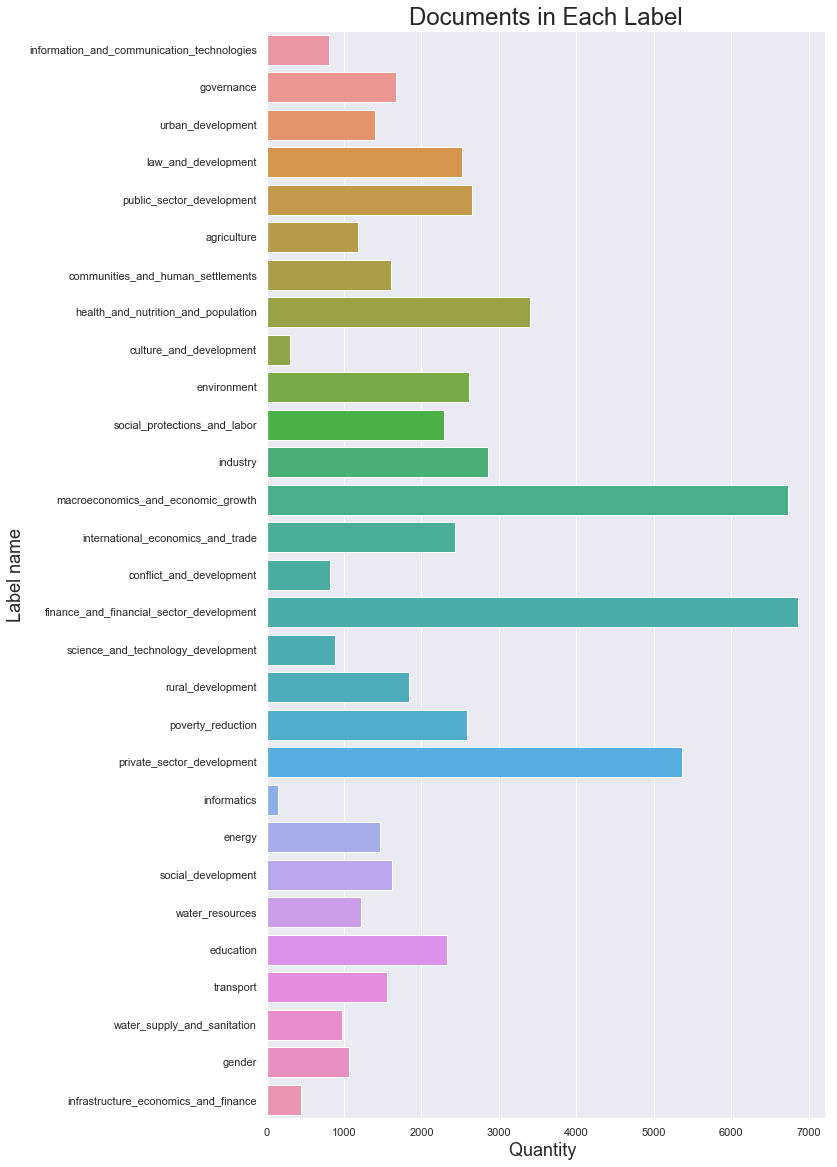

In [19]:
sns.set(font_scale = 1)
plt.figure(figsize=(10,20))

ax= sns.barplot(data_raw.iloc[:,1:].sum().values, categories)

plt.title("Documents in Each Label", fontsize=24)
plt.ylabel('Label name', fontsize=18)
plt.xlabel('Quantity ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,2:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()

plt.show()

**2.2 Documents having multiple labels**

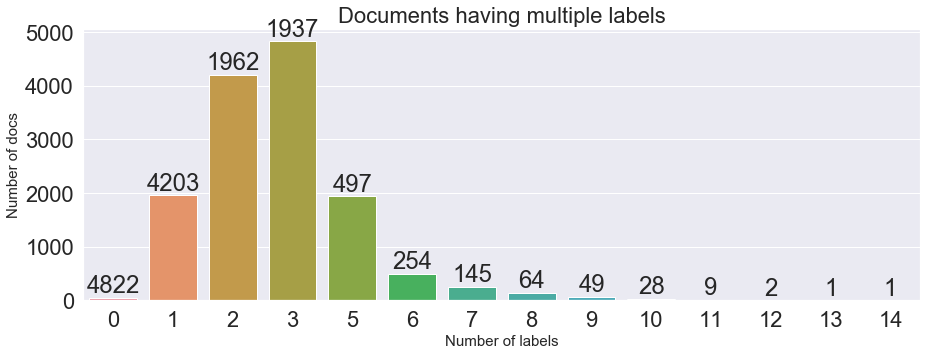

In [20]:
# Calculating number of docs having multiple labels

rowSums = data_raw.iloc[:,2:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,5))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Documents having multiple labels", fontsize=22)
plt.ylabel('Number of docs', fontsize=15)
plt.xlabel('Number of labels', fontsize=15)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

**2.3 See the most common words in a label**

In this part, we shall create a couple of visualizations to see the most common words in a label

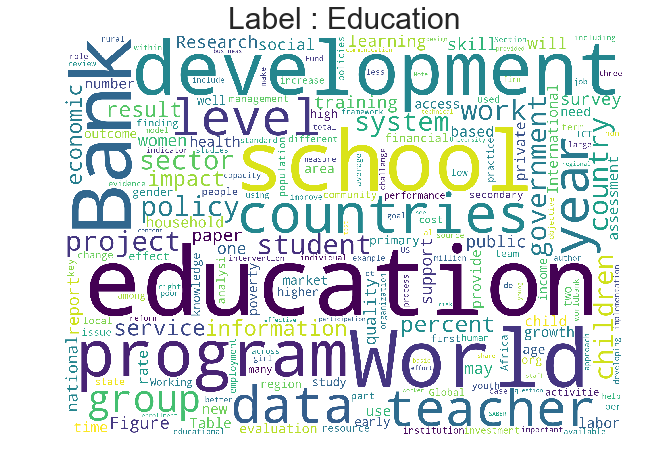

In [21]:
from wordcloud import WordCloud,STOPWORDS
plt.figure(figsize=(10,10))
# Education
subset = data_raw[data_raw.education==True]
text = subset.doc_text.values
cloud_education = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Label : Education",fontsize=30)
PlotA = plt.imshow(cloud_education)

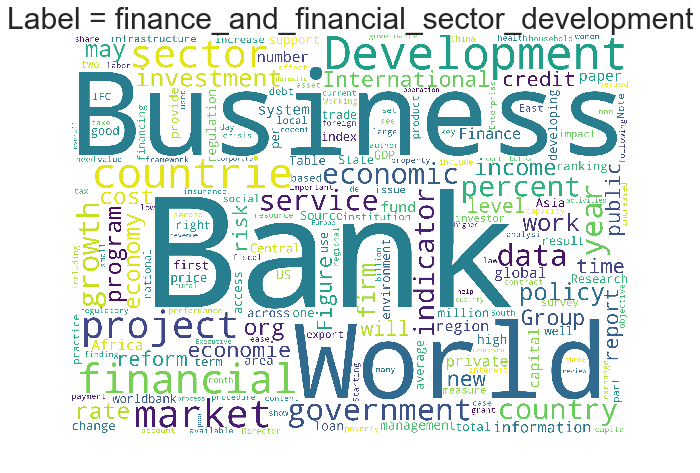

In [22]:
plt.figure(figsize=(10,10))
#finance_and_financial_sector_development
subset = data_raw[data_raw.finance_and_financial_sector_development==True]
text = subset.doc_text.values
cloud_finance_and_financial_sector_development = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Label = finance_and_financial_sector_development",fontsize=30)
plt.imshow(cloud_finance_and_financial_sector_development)


Note that, besides relevant words to the label,  in both word visualizations we get to see the words "bank" or "world". This words will be removed on the text processing part(remove most common words)